In [1]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import zipfile
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



zf = zipfile.ZipFile('Data_incidents.csv.zip') 
data = pd.read_csv('Data_incidents.csv.zip').reset_index()

/Users/josefinebjornholm/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Extract mass shooting incidents

In [2]:
mass_shootings = data[data['Mass Shooting']==True]

In [3]:
len(mass_shootings)

1637

## Incidents over time

In [157]:
mass_shootings.date.count()

1637

In [158]:
inc_time = mass_shootings.groupby('date')['index'].nunique()

In [159]:
inc_time = inc_time.to_frame()
inc_time.reset_index(level=0, inplace=True)

In [160]:
#check sum
inc_time['index'].sum()

1637

In [162]:
# format date
inc_time['Date'] = pd.to_datetime(inc_time.date.str.strip(), format = '%Y-%m-%d')#
inc_time.drop(['date'], axis=1);

In [163]:
# Create new date columns
inc_time['Year'] = inc_time.Date.apply(lambda x: x.year)
inc_time['Month'] = inc_time.Date.apply(lambda x: x.month)
inc_time['Year_Month'] = inc_time.Date.apply(lambda x: 100*x.year + x.month)

In [168]:
inc_time.head(2)

,date,index,Date,Year,Month,Year_Month
0,2013-01-01,2,2013-01-01,2013,1,201301
1,2013-01-07,1,2013-01-07,2013,1,201301


In [169]:
inc_year = inc_time.groupby('Year').index.sum()
inc_ym = inc_time.groupby('Year_Month').index.sum()

In [170]:
type(inc_year)

pandas.core.series.Series

In [171]:
year_month = inc_ym.to_frame()
year_month.reset_index(level=0, inplace=True)
#year_month['group'] = year_month['Year_Month'].apply(lambda x: x[1:2])

Text(0, 0.5, 'Incidents')

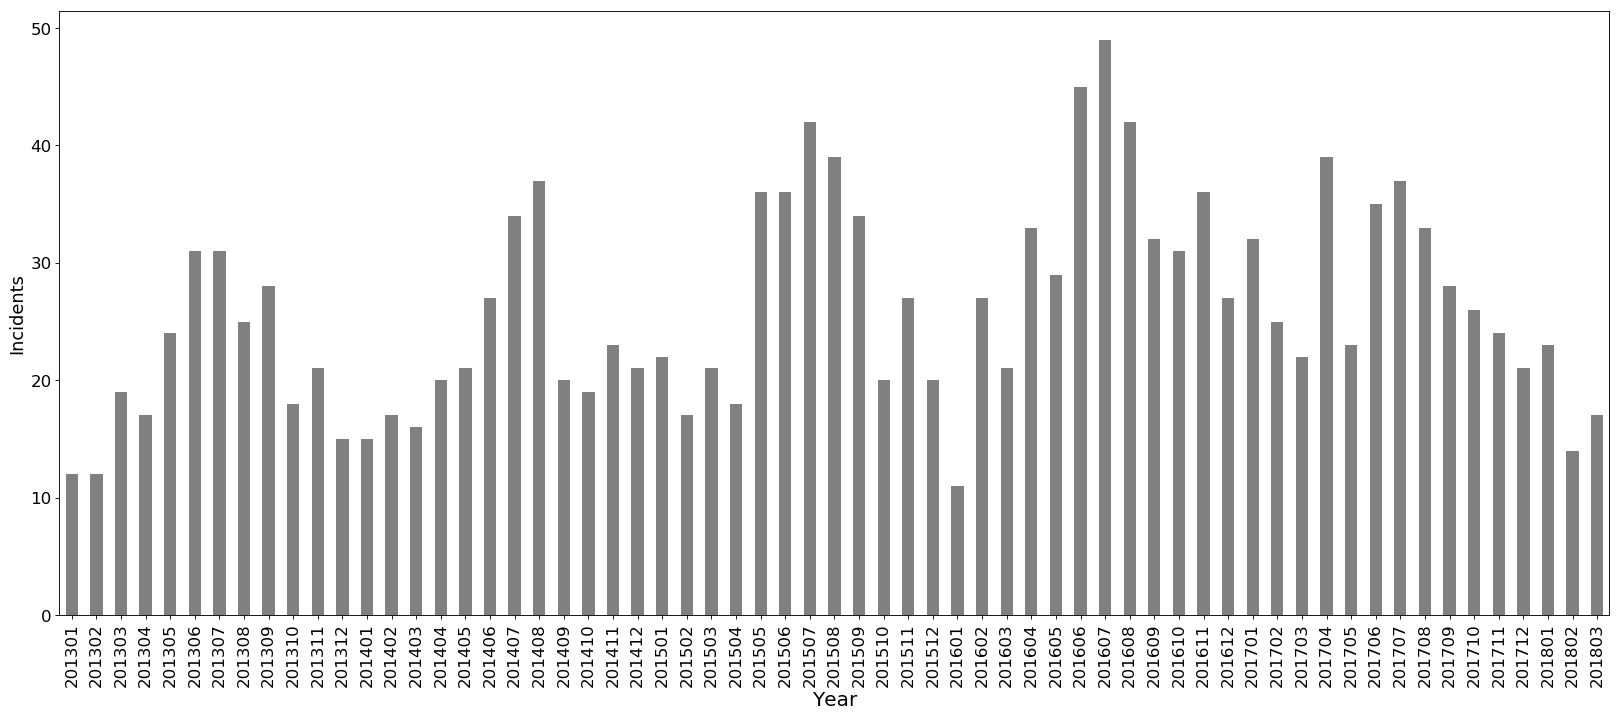

In [172]:
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)

plt.figure(num=None, figsize=(25, 10), dpi=80, facecolor='w', edgecolor='k')
inc_ym.plot.bar(color='grey',linewidth = '1')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Incidents', fontsize=16)





In [173]:
inc_all = data.date
inc_all = inc_all.to_frame()
inc_all['counts'] = 1

In [174]:
inc_all['Date'] = pd.to_datetime(inc_all.date.str.strip(), format = '%Y-%m-%d')#
inc_all.drop(['date'], axis=1);

In [175]:
inc_all['Year'] = inc_all.Date.apply(lambda x: x.year)
inc_all['Year_Month'] = inc_all.Date.apply(lambda x: 100*x.year + x.month)

In [176]:
all_YM = inc_all.groupby('Year_Month').counts.sum()

In [177]:
type(all_YM)

pandas.core.series.Series

In [178]:
type(inc_ym)

pandas.core.series.Series

In [179]:
all_YM_pd = all_YM.to_frame()
all_YM_pd.reset_index(level=0, inplace=True)
all_YM_pd.columns = ['Year_Month', 'inc_all']
ms_YM_pd = inc_ym.to_frame()
ms_YM_pd.reset_index(level=0, inplace=True)
ms_YM_pd.columns = ['Year_Month', 'inc_ms']

In [180]:
YM = pd.merge(all_YM_pd, ms_YM_pd, on='Year_Month')
YM = YM.loc[12:, ['Year_Month','inc_all', 'inc_ms']] # remove 2013 from data
len(YM)

51

In [182]:
YM['inc_ms'].sum()

1384

In [175]:
mass_shootings['victims'] = mass_shootings.n_killed + mass_shootings.n_injured


/Users/Anna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


103

In [180]:
max_vic = mass_shootings.victims.max()
mass_shootings[mass_shootings['victims']==max_vic]

,index,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,...,Child injured,Gun buy back action,Terrorism Involvement,Officer Involved Shooting - Accidental discharge - no injury required,Mistaken ID,Officer Involved Shooting - subject/suspect/perpetrator suicide by cop,Ghost gun,Political Violence,NAV,victims
130448,130448,130448,577157,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53,http://www.gunviolencearchive.org/incident/577157,...,False,False,True,False,False,False,False,False,False,103


In [189]:
mass_shootings.groupby('victims')['index'].nunique()

victims
4      924
5      399
6      125
7       87
8       40
9       19
10       8
11       3
12       8
13       3
14       2
15       3
16       1
17       2
18       3
19       2
20       1
21       1
25       1
27       1
34       1
35       1
47       1
103      1
Name: index, dtype: int64

TypeError: 'numpy.ndarray' object is not callable

In [100]:
ms_states = mass_shootings.groupby('state')['index'].nunique()
ms_states.sort_values(ascending=False)

state
California              194
Illinois                151
Florida                 116
Texas                    97
New York                 78
Georgia                  69
Pennsylvania             65
Louisiana                63
Tennessee                62
Ohio                     62
Michigan                 59
Missouri                 52
New Jersey               47
North Carolina           43
Virginia                 42
Indiana                  41
Maryland                 37
South Carolina           36
Alabama                  35
Mississippi              28
District of Columbia     26
Kentucky                 23
Arizona                  20
Washington               19
Minnesota                17
Connecticut              15
Oklahoma                 15
Kansas                   15
Colorado                 14
Massachusetts            13
Arkansas                 11
New Mexico               11
Wisconsin                10
Nevada                   10
Delaware                  7
Oregon        

In [6]:
for col in mass_shootings.columns:
    print(col)

index
Unnamed: 0
incident_id
date
state
city_or_county
address
n_killed
n_injured
incident_url
source_url
incident_url_fields_missing
congressional_district
gun_stolen
gun_type
incident_characteristics
latitude
location_description
longitude
n_guns_involved
notes
participant_age
participant_age_group
participant_gender
participant_name
participant_relationship
participant_status
participant_type
sources
state_house_district
state_senate_district
Shot - Wounded/Injured
Mass Shooting
Possession
Possession of gun by felon or prohibited person
Shot - Dead
Gang involvement
Shots Fired - No Injuries
Bar/club incident - in or around establishment
Officer Involved Incident
Officer Involved Shooting - subject/suspect/perpetrator killed
Drug involvement
Kidnapping/abductions/hostage
Under the influence of alcohol or drugs
Suicide
Murder/Suicide
Attempted Murder/Suicide
Domestic Violence
Home Invasion
Home Invasion - Resident killed
Armed robbery with injury/death and/or evidence of DGU found
Dri

# NEW ANALYSIS (TABLE OF CHARACTERISTICS) 

In [4]:
mass_shootings
mass_shootings['Date'] = pd.to_datetime(mass_shootings.date.str.strip(), format = '%Y-%m-%d')
mass_shootings = mass_shootings.drop(['date'], axis=1)

/Users/josefinebjornholm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
mass_shootings['Year'] = mass_shootings.Date.apply(lambda x: x.year)

In [6]:
mass_shootings = mass_shootings[mass_shootings['Year']!= 2013].reset_index()

In [7]:
df_incidents = mass_shootings.iloc[:, list(range(31,139))]
incidents = []

for col in df_incidents.columns: 
    incidents.append(col)

### Generating dataframes for participant gender, age, type and status

In [8]:
dataframes_gender = []

for row in mass_shootings['participant_gender'].fillna("0:,")[:len(mass_shootings)]:
    participants = np.array([re.split(r'::?', p) for p in re.split(r'\|\|?', row)]).T
    #print('participants: ', participants)

    data = dict(zip(*participants))
    #print('data: ', data)

    dataframe = pd.Series(data).to_frame().T
    #display(dataframe)

    dataframes_gender.append(dataframe)

gender = pd.concat(dataframes_gender).reset_index().drop('index', 1).fillna('')

/Users/josefinebjornholm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [9]:
len(gender)

1384

In [10]:
dataframes_age = []

for row in mass_shootings['participant_age'].fillna("0:,")[:len(mass_shootings)]:
    participants = np.array([re.split(r'::?', p) for p in re.split(r'\|\|?', row)]).T
    #print('participants: ', participants)

    data = dict(zip(*participants))
    #print('data: ', data)

    dataframe = pd.Series(data).to_frame().T
    #display(dataframe)

    dataframes_age.append(dataframe)

age = pd.concat(dataframes_age).reset_index().drop('index', 1).fillna('')

/Users/josefinebjornholm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [11]:
len(age)

1384

In [12]:
dataframes_status = []

for row in mass_shootings['participant_status'].fillna("0:,")[:len(mass_shootings)]:
    participants = np.array([re.split(r'::?', p) for p in re.split(r'\|\|?', row)]).T
    #print('participants: ', participants)

    data = dict(zip(*participants))
    #print('data: ', data)

    dataframe = pd.Series(data).to_frame().T
    #display(dataframe)

    dataframes_status.append(dataframe)

status = pd.concat(dataframes_status).reset_index().drop('index', 1).fillna('')

/Users/josefinebjornholm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [13]:
len(status)

1384

In [14]:
dataframes_type = []

for row in mass_shootings['participant_type'].fillna("0:,")[:len(mass_shootings)]:
    participants = np.array([re.split(r'::?', p) for p in re.split(r'\|\|?', row)]).T
    #print('participants: ', participants)

    data = dict(zip(*participants))
    #print('data: ', data)

    dataframe = pd.Series(data).to_frame().T
    #display(dataframe)

    dataframes_type.append(dataframe)

_type = pd.concat(dataframes_type).reset_index().drop('index', 1).fillna('')

/Users/josefinebjornholm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [15]:
len(_type)

1384

### Gender of victimes and suspects

In [42]:

combined_gender = gender.astype(str).add(',').add(_type.astype(str)) #.add(', ').add(status.astype(str))
com = combined_gender.fillna(',')

com['Male, Victim'] = com.apply(lambda row: sum(row[0:103]=='Male,Victim') ,axis=1)
com['Female, Victim'] = com.apply(lambda row: sum(row[0:103]=='Female,Victim') ,axis=1)
com['Male, Suspect'] = com.apply(lambda row: sum(row[0:103]=='Male,Subject-Suspect') ,axis=1)
com['Female, Suspect'] = com.apply(lambda row: sum(row[0:103]=='Female,Subject-Suspect') ,axis=1)
com['Victim1'] = com.apply(lambda row: sum(row[0:103]==',Victim') ,axis=1)
com['Victim2'] = com.apply(lambda row: sum(row[0:103]==',,Victim') ,axis=1)
com['Subject'] = com.apply(lambda row: sum(row[0:103]==',Subject-Suspect') ,axis=1)

com[['Male, Victim','Female, Victim','Male, Suspect','Female, Suspect','Victim1','Victim2','Subject']].sum()

Male, Victim       3921
Female, Victim     1506
Male, Suspect      1096
Female, Suspect      33
Victim1            1403
Victim2             111
Subject             108
dtype: int64

### Status of victimes and suspects

In [58]:

combined_status = status.astype(str).add(',').add(_type.astype(str)) #.add(', ').add(status.astype(str))
com_s = combined_status.fillna(',')

com_s['Killed, Victim'] = com.apply(lambda row: sum(row[0:103]=='Killed,Victim') ,axis=1)
com_s['Injured, Victim'] = com.apply(lambda row: sum(row[0:103]=='Injured,Victim') ,axis=1)
com_s['Unharmed/Arrested, Victim'] = com.apply(lambda row: sum(row[0:103]=='Unharmed, Arrested,Victim') ,axis=1)
com_s['Killed, Suspect'] = com.apply(lambda row: sum(row[0:103]=='Killed,Subject-Suspect') ,axis=1)
com_s['Injured, Suspect'] = com.apply(lambda row: sum(row[0:103]=='Injured,Subject-Suspect') ,axis=1)
com_s['Unharmed/Arrested, Suspect'] = com.apply(lambda row: sum(row[0:103]=='Unharmed, Arrested,Subject-Suspect') ,axis=1)

com_s[['Killed, Victim', 'Injured, Victim','Unharmed/Arrested, Victim','Killed, Suspect','Injured, Suspect','Unharmed/Arrested, Suspect']].sum()

Killed, Victim                1447
Injured, Victim               5458
Unharmed/Arrested, Victim        4
Killed, Suspect                 92
Injured, Suspect                25
Unharmed/Arrested, Suspect     561
dtype: int64

In [75]:
combined_gender_status = gender.astype(str).add(',').add(status.astype(str)) #.add(', ').add(status.astype(str))
com_gs = combined_gender_status.fillna(',')

com_gs['Male, Killed'] = com_gs.apply(lambda row: sum(row[0:103]=='Male,Killed') ,axis=1)
com_gs['Female, Killed'] = com_gs.apply(lambda row: sum(row[0:103]=='Female,Killed') ,axis=1)
com_gs['Male, Injured'] = com_gs.apply(lambda row: sum(row[0:103]=='Male,Injured') ,axis=1)
com_gs['Female, Injured'] = com_gs.apply(lambda row: sum(row[0:103]=='Female,Injured') ,axis=1)
#com_gs['Victim1'] = com_gs.apply(lambda row: sum(row[0:103]==',Victim') ,axis=1)
#com_gs['Victim2'] = com_gs.apply(lambda row: sum(row[0:103]==',,Victim') ,axis=1)
#com_gs['Subject'] = com_gs.apply(lambda row: sum(row[0:103]==',Subject-Suspect') ,axis=1)

com_gs[['Male, Killed','Female, Killed','Male, Injured','Female, Injured']].sum()

Male, Killed       1094
Female, Killed      418
Male, Injured      2903
Female, Injured    1083
dtype: int64

In [56]:
com_s.loc[2]

0                                                 Injured,Victim
1                                                 Injured,Victim
10                            Unharmed, Arrested,Subject-Suspect
100                                                            ,
101                                                            ,
102                                                            ,
11                            Unharmed, Arrested,Subject-Suspect
12                            Unharmed, Arrested,Subject-Suspect
13                            Unharmed, Arrested,Subject-Suspect
14                                                             ,
15                                                             ,
16                                                             ,
17                                                             ,
18                                                             ,
19                                                             ,
2                        

In [41]:
stacked = combined.stack()
stacked_df = pd.DataFrame(stacked)
combinations = stacked_df.reset_index()
stacked.unique()
#combinations.groupby(0)[0].count()

array(['Male,Victim', ',', 'Female,Victim', 'Male,Subject-Suspect',
       ',Victim', ',Subject-Suspect', ',,Victim',
       'Female,Subject-Suspect'], dtype=object)

In [20]:
# Function that separates the values in the cells with mamy victims

def separate(df):
    df=df.split("||")
    df=[(x.split("::")) for x in df]
    y = []
    for  i in range (0, len(df)):
        y.append(df[i][-1])
    return(y) 

In [36]:
# Counting males and females 
mass_shootings['participant_gender'] = mass_shootings['participant_gender'].fillna("0::Zero")
mass_shootings['gender'] = mass_shootings['participant_gender'].apply(lambda x: separate(x))
mass_shootings['Males'] = mass_shootings['gender'].apply(lambda x: x.count('Male'))
mass_shootings['Females'] = mass_shootings['gender'].apply(lambda x: x.count('Female'))

# Counting victims and subjects    
mass_shootings['participant_type'] = mass_shootings['participant_type'].fillna("0::Zero")
mass_shootings['type'] = mass_shootings['participant_type'].apply(lambda x: separate(x))
mass_shootings['Victims'] = mass_shootings['type'].apply(lambda x: x.count('Victim'))
mass_shootings['Subject'] = mass_shootings['type'].apply(lambda x: x.count('Subject-Suspect'))

In [37]:
print(mass_shootings['Victims'].sum())
print(mass_shootings['Subject'].sum())

6892
1221


In [59]:
char = pd.DataFrame(mass_shootings[incidents].sum())
char.columns = ['count']
char = char[char['count'] >= 50]

In [72]:
char.sort_values('count', ascending=False)

,count
Mass Shooting,1384.0
Shot - Wounded/Injured,1321.0
Shot - Dead,720.0
Bar/club incident - in or around establishment,231.0
Drive-by,218.0
Gang involvement,160.0
Possession,138.0
Domestic Violence,93.0
Institution/Group/Business,89.0
Mass Murder,81.0
